In [2]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", None)

In [3]:
efreq_5p5 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Q_fac_LO5.5GHz.txt', skiprows=4)
efreq_6p3 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Q_fac_LO6.3.txt', skiprows=4)

In [4]:
efreq_5p5.loc[1]

% Eigenfrequency (GHz)                            Frequency (GHz)                                   Quality factor (1)    5.181973988284765+0.023623669382107356i       ...
Name: 1, dtype: object

In [5]:
def fix_csv(filename): 
    filepath = '/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/'
    file = pd.read_csv(filepath + filename, skiprows=4)

    # Define a function to convert string representation to complex number
    def convert_to_j(x):
        if isinstance(x, str):  # Only try to convert if it's a string
            try:
                return x.replace('i', 'j')  # Replace 'i' with 'j' for Python compatibility
            except ValueError:
                return None  # Return None for invalid values (if any)
        else:
            return x  # If it's already a number (e.g., float), return it unchanged
        
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(convert_to_j) # convert i to j for column 
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(complex)
    file[['Frequency (GHz)', 'Quality factor (1)']] = file[['Frequency (GHz)', 'Quality factor (1)']].apply(pd.to_numeric, errors='coerce')

    file['Eigenfreq_Real'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.real)
    file['Eigenfreq_Imag'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.imag)

    return file

In [9]:
def read_eigen_txt(filename):
    # Path to your file
    file_path = '/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/' + filename

    # Read the file and skip metadata lines
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Filter out comment lines starting with '%'
    data_lines = [line.strip() for line in lines if not line.strip().startswith('%') and line.strip()]

    # Split lines into components and parse
    data = []
    for line in data_lines:
        parts = line.split()
        if len(parts) >= 3:
            # Convert first to complex, second and third to float
            eigenfrequency = complex(parts[0].replace('i', 'j'))  # Replace i with j for Python
            frequency = float(parts[1])
            quality_factor = float(parts[2])
            data.append((eigenfrequency, frequency, quality_factor))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['Eigenfrequency', 'Frequency (GHz)', 'Quality Factor'])
    return df

In [11]:
eg_5p5 = read_eigen_txt('Q_fac_LO5.5GHz.txt')
eg_6p3 = read_eigen_txt('Q_fac_LO6.3.txt')

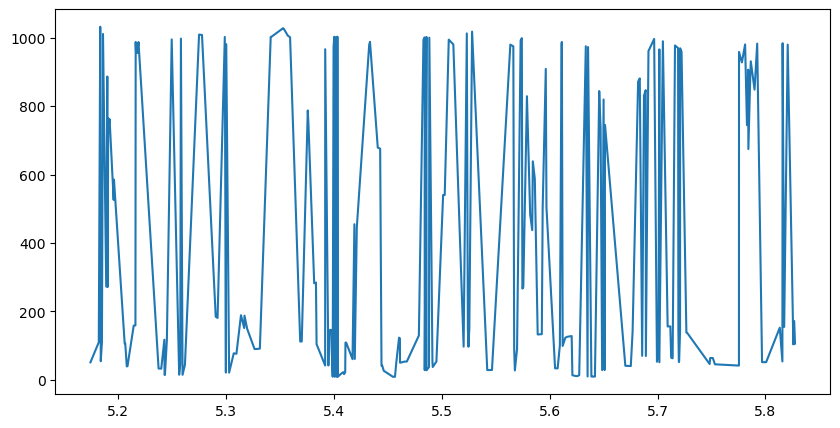

In [47]:
plt.figure(figsize = (10,5))
plt.plot(eg_5p5['Frequency (GHz)'], eg_5p5['Quality Factor'])

In [34]:
combine = pd.concat([eg_5p5, eg_6p3])

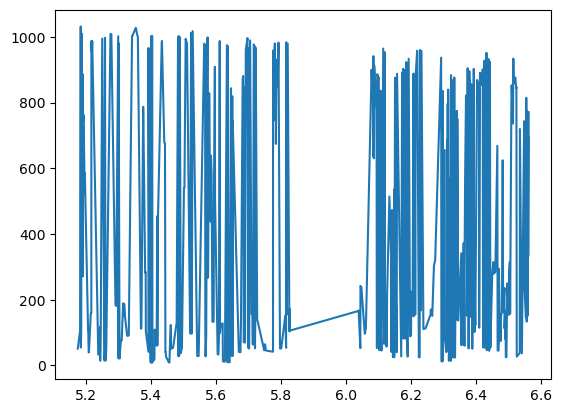

In [13]:
plt.plot(combine['Frequency (GHz)'], combine['Quality Factor'])

In [23]:
Efreq_cf2p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center2p5_n109.csv', skiprows=4)
Efreq_cf3p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center3p5_n109.csv', skiprows=4)
Efreq_cf4p0 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center4_n109.csv', skiprows=4)
Efreq_cf4p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_centerfreq4p5GHz_n109.csv', skiprows=4)

In [49]:
efreq_cf5p3 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Q_LO5.3_lossE-9.csv', skiprows=4)

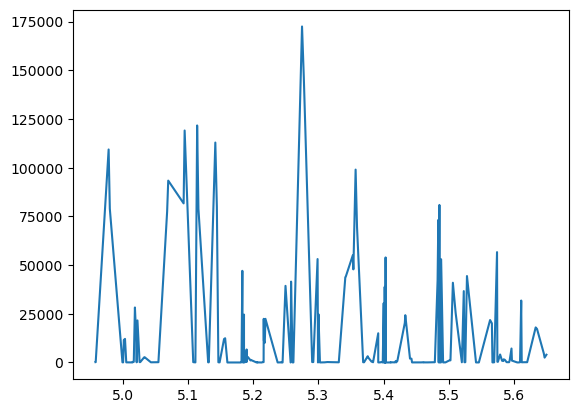

In [51]:
plt.plot(efreq_cf5p3['Frequency (GHz)'], efreq_cf5p3['Quality factor (1)'])

In [24]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1.7745196837838606+0.18564818739771877i,1.774520,4.779254
1,1.7745446799467053+0.18565326392788753i,1.774545,4.779191
2,1.7876843256815418+0.27784221533897746i,1.787684,3.217086
3,1.8081357957378286+0.05110040541190931i,1.808136,17.691991
4,1.808155595227706+0.051104389859656124i,1.808156,17.690805
...,...,...,...
213,3.2527751098442206+0.0026723980611954596i,3.252775,608.587313
214,3.2528697053568547+0.002675302008143532i,3.252870,607.944392
215,3.2570932388708007+0.06998719544133154i,3.257093,23.269208
216,3.2572840698279424+0.06997329579141273i,3.257284,23.275194


In [25]:
def fix_csv(file): 
    
    # Define a function to convert string representation to complex number
    def convert_to_j(x):
        if isinstance(x, str):  # Only try to convert if it's a string
            try:
                return x.replace('i', 'j')  # Replace 'i' with 'j' for Python compatibility
            except ValueError:
                return None  # Return None for invalid values (if any)
        else:
            return x  # If it's already a number (e.g., float), return it unchanged
        
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(convert_to_j) # convert i to j for column 
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(complex)
    file[['Frequency (GHz)', 'Quality factor (1)']] = file[['Frequency (GHz)', 'Quality factor (1)']].apply(pd.to_numeric, errors='coerce')

    # file['Eigenfreq_Real'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.real)
    # file['Eigenfreq_Imag'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.imag)

    return file

    

In [26]:
E_cf2p5 = fix_csv(Efreq_cf2p5)
E_cf3p5 = fix_csv(Efreq_cf3p5)
E_cf4p0 = fix_csv(Efreq_cf4p0)
E_cf4p5 = fix_csv(Efreq_cf4p5)

In [ ]:
all_new = pd.concat()

In [ ]:
E_cf2p5.rename(columns=[''])

In [27]:
E_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1.774520+0.185648j,1.774520,4.779254
1,1.774545+0.185653j,1.774545,4.779191
2,1.787684+0.277842j,1.787684,3.217086
3,1.808136+0.051100j,1.808136,17.691991
4,1.808156+0.051104j,1.808156,17.690805
...,...,...,...
213,3.252775+0.002672j,3.252775,608.587313
214,3.252870+0.002675j,3.252870,607.944392
215,3.257093+0.069987j,3.257093,23.269208
216,3.257284+0.069973j,3.257284,23.275194


In [35]:
combine.rename(columns={'Quality Factor': 'Quality factor (1)', 'Eigenfrequency': '% Eigenfrequency (GHz)'}, inplace=True)


In [33]:
combine

In [54]:
all = pd.concat([E_cf2p5, E_cf3p5, E_cf4p0, E_cf4p5, efreq_cf5p3])
all

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,(1.7745196837838606+0.18564818739771877j),1.774520,4.779254
1,(1.7745446799467053+0.18565326392788753j),1.774545,4.779191
2,(1.7876843256815418+0.27784221533897746j),1.787684,3.217086
3,(1.8081357957378286+0.05110040541190931j),1.808136,17.691991
4,(1.808155595227706+0.051104389859656124j),1.808156,17.690805
...,...,...,...
235,5.633499691292707+1.5647035531947005E-4i,5.633500,18001.811525
236,5.63558940919355+1.6372576825445315E-4i,5.635589,17210.453398
237,5.645971423595716+5.991644485693892E-4i,5.645971,4711.537406
238,5.647217719764305+0.0011276806018015776i,5.647218,2503.908337


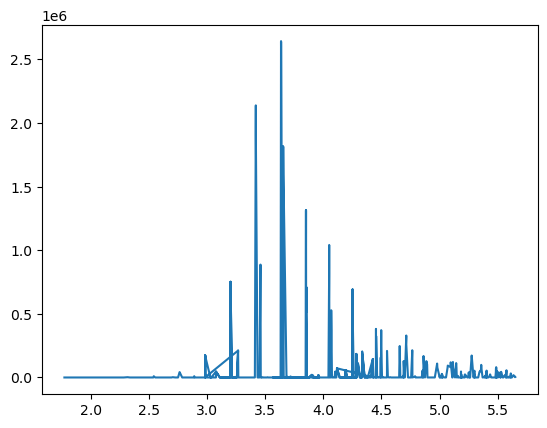

In [55]:
plt.plot(all['Frequency (GHz)'], all['Quality factor (1)'])

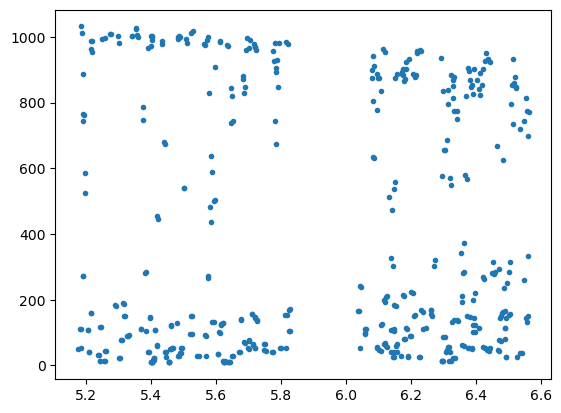

In [45]:
plt.scatter(combine['Frequency (GHz)'], combine['Quality factor (1)'], marker='.')